## Predspracovanie

In [1]:
import pandas as pd
df = pd.read_csv("other_train.csv")
personal_df = pd.read_csv("personal_train.csv")
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import scipy.stats as stats
from scipy.stats import boxcox
#from fancyimpute import KNN


#### Bohužiaľ sa ani po veľkej snahe nepodarilo rozbehať KNN doplnenie, tak sme porovnávali metódy doplnenia priemerom segmentu, priemerom a mediánom.

In [2]:
data['TT4'] = pd.DataFrame(KNN(k=10).complete(data['TT4']))

NameError: name 'KNN' is not defined

## TT4

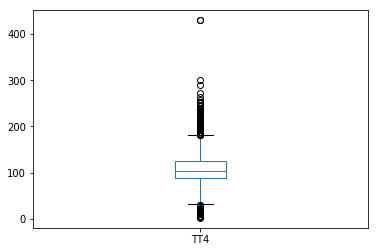

In [3]:
df['TT4'].plot(kind='box')

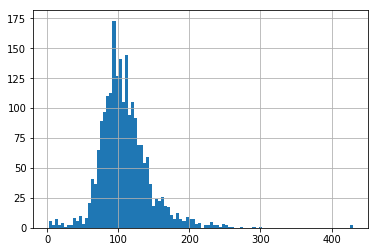

In [4]:
df['TT4'].hist(bins=100)

### Doplnenie hodnôt podľa priemeru segmentu.

#### Rozdelíme si dáta na 11 častí po 220.

In [5]:
TT4_split = np.split(df['TT4'], [220,440,660,880,1100,1320,1540,1760,1980,2200])

for i in range(11):
    pd.Series(TT4_split[i]).fillna(np.mean(TT4_split[i]),inplace=True)

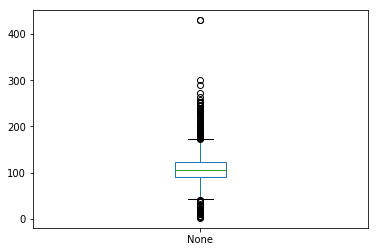

In [6]:
#df['TSH'] = 
TT4_priemer_segmentu = pd.Series(np.concatenate(TT4_split))
(TT4_priemer_segmentu).plot(kind='box')
#df['TSH'].isnull().sum()

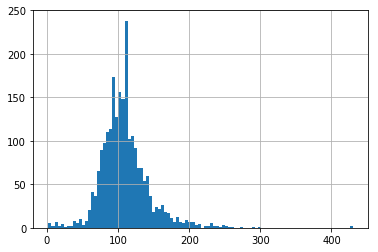

In [7]:
TT4_priemer_segmentu.hist(bins=100)

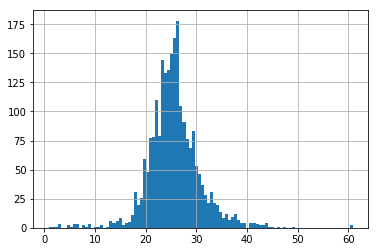

In [8]:
TT4_priemer_segmentu_boxcox, attributes = boxcox(TT4_priemer_segmentu)
pd.Series(TT4_priemer_segmentu_boxcox).hist(bins=100)

### Doplnenie hodnôt podľa mediánu.

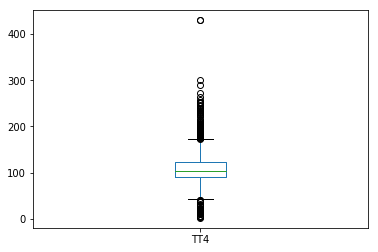

In [9]:
#TT4_median = np.split(df['TT4'],1
#FTI_2 = data['FTI'].fillna(data['FTI'].median())
TT4_median = df['TT4'].fillna(df['TT4'].median())
(TT4_median).plot(kind='box')

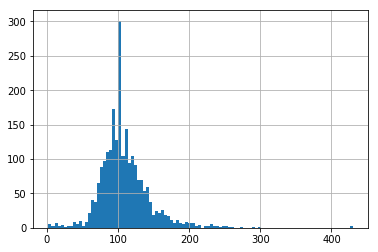

In [10]:
TT4_median.hist(bins=100)

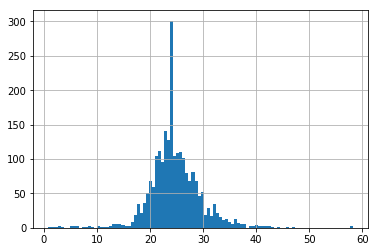

In [11]:
TT4_median_boxcox, attributes = boxcox(TT4_median)
pd.Series(TT4_median_boxcox).hist(bins=100)

## Doplnenie hodnôt podľa priemeru

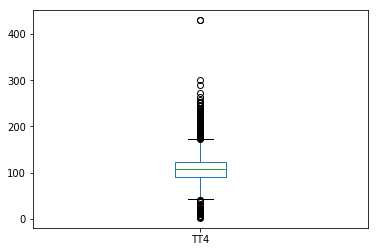

In [12]:
TT4_mean = df['TT4'].fillna(df['TT4'].mean())
(TT4_mean).plot(kind='box')

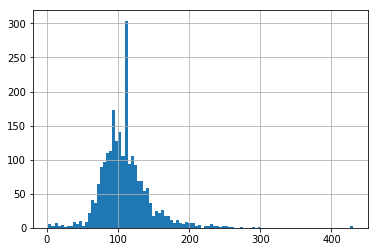

In [13]:
TT4_mean.hist(bins=100)

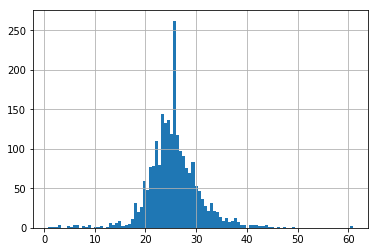

In [14]:
    TT4_mean_boxcox, attributes = boxcox(TT4_mean)
    pd.Series(TT4_mean_boxcox).hist(bins=100)

Vidíme, že spomedzi týchto typov doplnení chýbajúcich hodnôt je najlepšie doplnenie podľa priemeru segmentu. 

In [15]:
df['TT4'].shape[0]

2287

In [16]:
df['TT4'].isnull().sum()

160

In [17]:
TT4_priemer_segmentu.shape[0]

2287

In [18]:
TT4_priemer_segmentu.isnull().sum()

0

In [19]:
df['TT4'] = TT4_priemer_segmentu

In [20]:
df['TT4'] = df['TT4'].round(2)

In [21]:
df

,Unnamed: 0,name,address,query hyperthyroid,T4U measured,FTI measured,lithium,TT4,T4U,capital-loss,capital-gain,query hypothyroid,on thyroxine,tumor,TSH,T3,fnlwgt,FTI,hours-per-week,sick,thyroid surgery,workclass,I131 treatment,TT4 measured,class,goitre,TSH measured,hypopituitary,query on thyroxine,personal_info,T3 measured,on antithyroid medication,referral source,education-num,psych,occupation,TBG measured,TBG,pregnant
0,0,Dora Richard,"91737 Francis Valley\nWest Richard, AK 77876",f,t,t,f,118.00,0.88,0.0,0.0,f,f,f,0.600,2.4,360593.0,135,30.0,f,f,Private,f,t,negative._552,f,t,f,f,Black|United-States\nHS-grad -- Divorced|Unmar...,t,f,SVI,9.0,f,Sales,f,?,f
1,1,Pamela Foote,"79316 Roberts Streets\nWest Williamfurt, ME 99813",f,t,t,f,122.00,1.05,0.0,2202.0,f,f,t,0.600,2.5,195329.0,116,35.0,f,f,private,f,t,negative.|460,f,t,f,f,White|Italy\nHS-grad -- Widowed|Not-in-family,t,f,SVI,9.0,f,Other-service,f,?,f
2,2,Walter Jordan,"74254 Joseph Dam Suite 042\nAndersonchester, S...",f,t,t,f,93.00,0.86,0.0,0.0,f,f,f,5.100,2.8,98776.0,109,30.0,f,f,?,f,t,negative._1324,f,t,f,f,White|United-States\nSome-college -- Never-mar...,t,f,other,10.0,f,?,f,?,f
3,3,Terry Mcbain,2786 Kimberly Greens Suite 871\nNew Reginaldsi...,f,t,t,f,101.00,0.94,0.0,7688.0,f,f,f,1.000,2.0,274683.0,108,50.0,f,f,Self-emp-not-inc,f,t,negative.|2187,f,t,f,f,White|United-States\nSome-college -- Married-c...,t,FALSE,SVI,10.0,f,Sales,f,?,f
4,4,Perla Mclean,"171 Rachel Lodge\nEast Michael, HI 44722",f,t,t,f,103.00,1.35,0.0,0.0,f,f,f,1.300,2.2,323619.0,76,40.0,f,f,Private,f,t,negative.|975,f,t,f,f,White|United-States\nSome-college -- Never-mar...,t,f,other,10.0,f,Adm-clerical,f,?,f
5,5,Edward Odom,"7316 Adams Crossing Apt. 148\nSaraport, IN 20516",f,t,t,f,100.00,1.07,0.0,0.0,f,f,f,0.500,2.4,162923.0,93,60.0,f,f,Self-emp-not-inc,t,t,negative.|2856,f,t,f,f,White|United-States\nHS-grad -- Married-civ-sp...,t,f,other,9.0,f,Craft-repair,f,?,f
6,6,Troy Noyer,"6364 Crawford Ways Apt. 844\nSouth Lauraland, ...",f,f,f,f,169.00,NaN,0.0,0.0,f,f,f,0.100,2.0,436798.0,?,40.0,f,f,NaN,f,t,negative.|2886,f,t,f,f,White|United-States\nSome-college -- Married-c...,t,f,other,10.0,f,Machine-op-inspct,f,?,f
7,7,Coletta Holladay,"169 Yesenia Circle\nMichaelberg, OK 75412",f,t,t,f,72.00,1.05,0.0,0.0,f,f,f,0.800,2.3,211028.0,68,40.0,f,f,Private,f,t,negative.|155,f,t,f,f,White|United-States\nSome-college -- Never-mar...,t,f,other,10.0,f,Adm-clerical,f,?,f
8,8,Kathryn Woodard,Unit 1940 Box 8387\nDPO AA 25365,t,f,f,f,110.06,NaN,0.0,0.0,f,f,f,NaN,2.6,191451.0,?,60.0,f,f,NaN,f,f,negative.|1856,f,f,f,f,Black|United-States\nMasters -- Divorced|Unmar...,t,f,other,14.0,f,Exec-managerial,f,?,f
9,9,Alyce Parlato,"2427 David Dale Suite 975\nNew Loriton, MN 87110",f,t,t,f,63.00,1.08,0.0,7688.0,t,t,f,178.000,1.0,167497.0,59,50.0,f,f,Private,f,t,negative.|2175,f,t,f,f,White|United-States\nSome-college -- Married-c...,t,f,other,10.0,f,Exec-managerial,f,?,f


### Riešenie výchýlených hodnôt najprv vymazaním a potom nahradením hradničnými hodnotami rozdelenia.

In [22]:
dolnyqvTT4 = df['TT4'].quantile(q=0.05)
hornyqvTT4 = df['TT4'].quantile(q=0.95)
dolnyqvTT4,hornyqvTT4

(65.0, 169.0)

In [23]:
Applied_percentileTT4 = TT4_priemer_segmentu

In [24]:
for i in range(len(df)):
    if Applied_percentileTT4[i] < dolnyqvTT4 : 
        Applied_percentileTT4[i] = dolnyqvTT4
    elif Applied_percentileTT4[i] > hornyqvTT4:
        Applied_percentileTT4[i] = hornyqvTT4
        
        

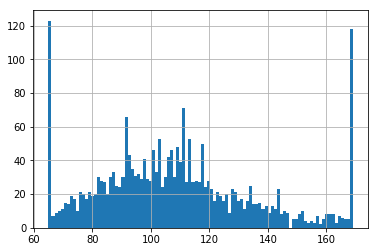

In [25]:
Applied_percentileTT4.hist(bins=100)

In [26]:
#df['TT4'][(df['TT4'] > down) &(df['TT4'] < up)].hist(bins=100)

Po úprave dát s 95 a 5 percentilom vidíme veľký nárast hodnôt okolo týchto percentilov. Preto sme sa rozhodli otliere ponechať. 

## T4U

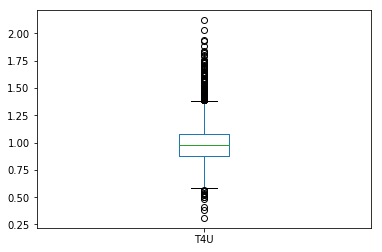

In [27]:
df['T4U'].plot(kind='box')

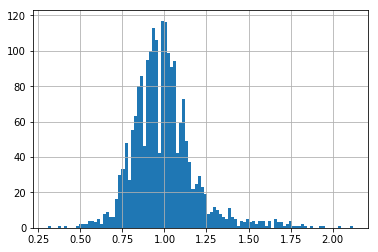

In [28]:
df['T4U'].hist(bins=100)

### Doplnenie hodnôt podľa priemeru segmentu.

In [29]:
T4U_split = np.split(df['T4U'], [220,440,660,880,1100,1320,1540,1760,1980,2200])

for i in range(11):
    pd.Series(T4U_split[i]).fillna(np.mean(T4U_split[i]),inplace=True)

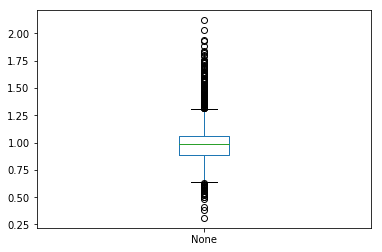

In [30]:
T4U_priemer_segmentu = pd.Series(np.concatenate(T4U_split))
(T4U_priemer_segmentu).plot(kind='box')

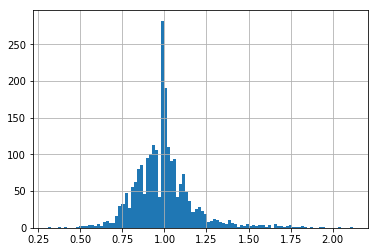

In [31]:
T4U_priemer_segmentu.hist(bins=100)

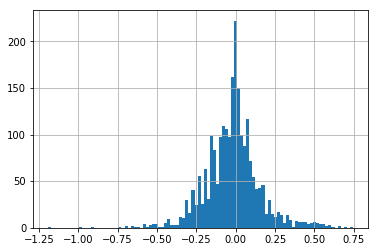

In [32]:
T4U_priemer_segmentu_boxcox, attributes = boxcox(T4U_priemer_segmentu)
pd.Series(T4U_priemer_segmentu_boxcox).hist(bins=100)

### Doplnenie hodnôt podľa mediánu.

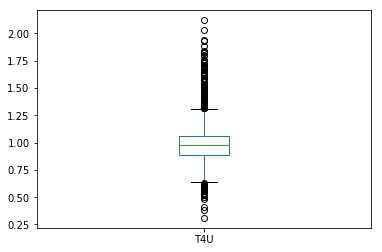

In [33]:
T4U_median = df['T4U'].fillna(df['T4U'].median())
(T4U_median).plot(kind='box')


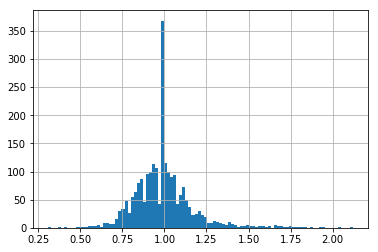

In [34]:
T4U_median.hist(bins=100)

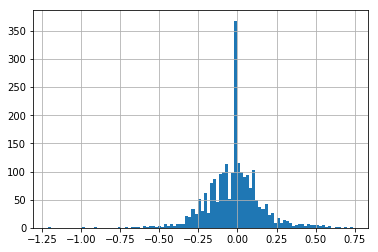

In [35]:
T4U_median_boxcox, attributes = boxcox(T4U_median)
pd.Series(T4U_median_boxcox).hist(bins=100)


## Doplnenie hodnôt podľa priemeru

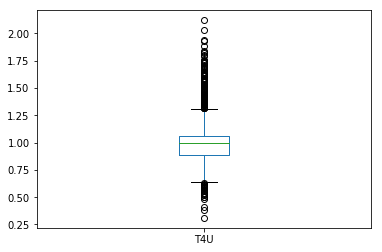

In [36]:
T4U_mean = df['T4U'].fillna(df['T4U'].mean())
(T4U_mean).plot(kind='box')

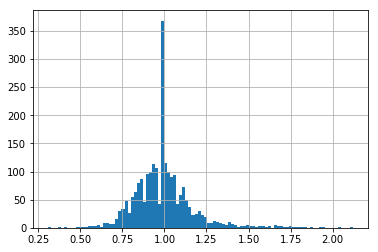

In [37]:
T4U_mean.hist(bins=100)

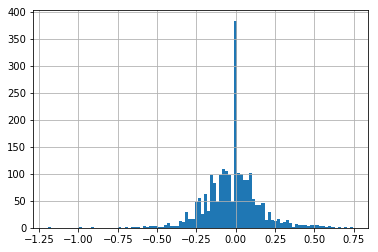

In [38]:
T4U_mean_boxcox, attributes = boxcox(T4U_mean)
pd.Series(T4U_mean_boxcox).hist(bins=100)

#### Aj pri ďalšom atribúte bol najlepší spôsob doplnenia priemerom segmentu. Doplníme tak aj zvyšné atribúty.

In [39]:
df['T4U'] = T4U_priemer_segmentu
df['T4U'] = df['T4U'].round(2)

In [40]:
df['T4U'].isnull().sum()

0

In [41]:
dolnyqvT4U = df['T4U'].quantile(q=0.05)
hornyqvT4U = df['T4U'].quantile(q=0.95)
dolnyqvT4U,hornyqvT4U


(0.75, 1.3069999999999982)

In [42]:
Applied_percentileT4U = T4U_priemer_segmentu

In [43]:
for i in range(len(df)):
    if Applied_percentileT4U[i] < dolnyqvT4U : 
        Applied_percentileT4U[i] = dolnyqvT4U
    elif Applied_percentileT4U[i] > hornyqvT4U:
        Applied_percentileT4U[i] = hornyqvT4U

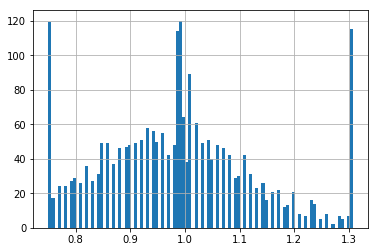

In [44]:
Applied_percentileT4U.hist(bins=100)

Toto vyzerá lepšie ako predchádzajúca TT4. Otliere teda nahradíme hraničnými hodnotami.

In [45]:
df['T4U'] = Applied_percentileT4U

In [46]:
df['T4U'] = df['T4U'].round(2)

## TSH, T3, FTI

In [47]:
TSH_split = np.split(df['TSH'], [220,440,660,880,1100,1320,1540,1760,1980,2200])
for i in range(11):
    pd.Series(TSH_split[i]).fillna(np.mean(TSH_split[i]),inplace=True)

In [48]:
T3_split = np.split(df['T3'], [220,440,660,880,1100,1320,1540,1760,1980,2200])
for i in range(11):
    pd.Series(T3_split[i]).fillna(np.mean(T3_split[i]),inplace=True)

In [49]:
df['FTI'] = df['FTI'].replace('?',np.nan)

In [50]:
df['FTI'] = pd.to_numeric(df['FTI'])

In [51]:
df['FTI'].mean()

111.26062837506136

In [52]:

FTI_split = np.split(df['FTI'], [220,440,660,880,1100,1320,1540,1760,1980,2200])

In [53]:
for i in range(11):
    pd.Series(FTI_split[i]).fillna(np.mean(FTI_split[i]),inplace=True)

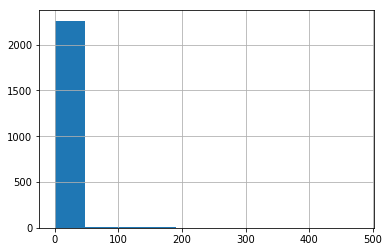

In [54]:
TSH_priemer_segmentu = pd.Series(np.concatenate(TSH_split))
TSH_priemer_segmentu.hist(bins=10)

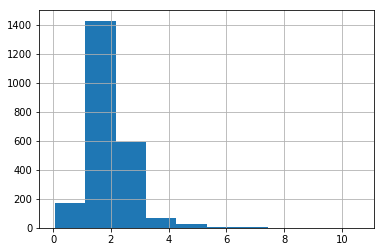

In [55]:
T3_priemer_segmentu = pd.Series(np.concatenate(T3_split))
T3_priemer_segmentu.hist(bins=10)

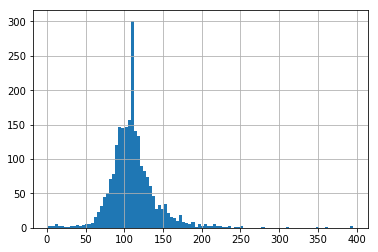

In [56]:
FTI_priemer_segmentu = pd.Series(np.concatenate(FTI_split))
FTI_priemer_segmentu.hist(bins=100)

In [57]:
df['TSH'] = T4U_priemer_segmentu
df['TSH'] = df['TSH'].round(2)

df['T3'] = T4U_priemer_segmentu
df['T3'] = df['T3'].round(2)

df['FTI'] = T4U_priemer_segmentu

In [58]:
df['FTI'] = df['FTI'].round(2)

In [59]:
dolnyqvFTI = FTI_priemer_segmentu.quantile(q=0.05)
hornyqvFTI = FTI_priemer_segmentu.quantile(q=0.95)
dolnyqvFTI,hornyqvFTI

(71.0, 164.0)

In [60]:
Applied_percentileFTI = FTI_priemer_segmentu

In [61]:
for i in range(len(df)):
    if Applied_percentileFTI[i] < dolnyqvFTI : 
        Applied_percentileFTI[i] = dolnyqvFTI
    elif Applied_percentileFTI[i] > hornyqvFTI:
        Applied_percentileFTI[i] = hornyqvFTI

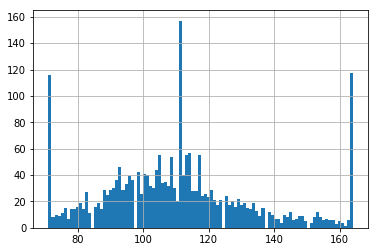

In [62]:
Applied_percentileFTI.hist(bins=100)

Toto bude tiež lepšie riešenie, ako nechať otliere.

In [63]:
df['FTI'] = Applied_percentileFTI

### V atribútoch, kde sa nachádzajú true/false hodnoty nahradíme chýbajúce hodnoty najčastejšie sa vyskytujúcim údajom.

In [159]:
s = (df.eq('t') | df.eq('f')).any()
pole = s[s].index.values
pole

array(['query hyperthyroid', 'T4U measured', 'FTI measured', 'lithium',
       'query hypothyroid', 'on thyroxine', 'tumor', 'sick',
       'thyroid surgery', 'I131 treatment', 'TT4 measured', 'goitre',
       'TSH measured', 'query on thyroxine', 'T3 measured',
       'on antithyroid medication', 'psych', 'pregnant'], dtype=object)

In [162]:
for i in range(len(pole)):
    pd.Series(df[pole[i]]).fillna(df[pole[i]].value_counts().idxmax(),inplace=True)

## Doplnenie occupation a referral source najčastejšou hodnotou a následne workclass podľa occupation

In [66]:
df['occupation'].value_counts()

 Adm-clerical         413
 Other-service        346
 Prof-specialty       310
 Sales                266
 Exec-managerial      236
 Craft-repair         159
 ?                    154
 Machine-op-inspct    128
 Tech-support          65
 Transport-moving      59
 Handlers-cleaners     53
 Protective-serv       35
 Farming-fishing       35
 Priv-house-serv       24
Name: occupation, dtype: int64

In [67]:
df['occupation'] = df['occupation'].str.strip()

In [68]:
df['occupation'] = df['occupation'].replace('?',np.nan)

In [69]:
df['occupation'].value_counts()

Adm-clerical         413
Other-service        346
Prof-specialty       310
Sales                266
Exec-managerial      236
Craft-repair         159
Machine-op-inspct    128
Tech-support          65
Transport-moving      59
Handlers-cleaners     53
Protective-serv       35
Farming-fishing       35
Priv-house-serv       24
Name: occupation, dtype: int64

In [70]:
df['occupation'].value_counts().idxmax()

'Adm-clerical'

In [71]:
pd.Series(df['occupation']).fillna(df['occupation'].value_counts().idxmax(),inplace=True)

In [72]:
pd.Series(df['referral source']).fillna(df['referral source'].value_counts().idxmax(),inplace=True)

In [73]:
df['workclass'].value_counts()

 Private             1316
private               141
 Local-gov            132
 ?                    126
 Self-emp-not-inc     116
??                     73
 State-gov             67
 Federal-gov           49
 Self-emp-inc          43
?                      17
local-gov              15
Nan                    13
self-emp-not-inc       11
state-gov              10
self-emp-inc            7
federal-gov             6
 Without-pay            1
Name: workclass, dtype: int64

In [74]:
df['workclass'] = df['workclass'].str.strip()

In [75]:
df['workclass'] = df['workclass'].replace('?',np.nan)
df['workclass'] = df['workclass'].replace('??',np.nan)
df['workclass'] = df['workclass'].replace('Nan',np.nan)

In [76]:
df['workclass'] = df['workclass'].str.lower()

In [77]:
df['workclass'].value_counts()

private             1457
local-gov            147
self-emp-not-inc     127
state-gov             77
federal-gov           55
self-emp-inc          50
without-pay            1
Name: workclass, dtype: int64

In [78]:
pd.crosstab(index=df['occupation'], columns=df['workclass'], margins=True)

workclass,federal-gov,local-gov,private,self-emp-inc,self-emp-not-inc,state-gov,without-pay,All
occupation,,,,,,,,
Adm-clerical,20,36,290,4,7,20,0,377
Craft-repair,3,7,115,2,19,1,0,147
Exec-managerial,10,16,151,10,14,10,0,211
Farming-fishing,0,0,15,2,13,0,1,31
Handlers-cleaners,1,0,44,0,2,0,0,47
Machine-op-inspct,0,1,102,1,2,0,0,106
Other-service,3,9,269,4,14,10,0,309
Priv-house-serv,0,0,24,0,0,0,0,24
Prof-specialty,10,57,150,7,27,25,0,276


In [79]:
dictWORKCLASS = {}

In [80]:
df['workclass'] = df['workclass'].fillna('?')

In [81]:
pd.Series(df['Education']).fillna(df['Education'].value_counts().idxmax(),inplace=True)

KeyError: 'Education'

In [82]:
df[df['occupation'] == df['occupation'][0]]['workclass'].value_counts().idxmax()

'private'

In [83]:
for i in range(len(df['workclass'])):
    if df['workclass'][i] != '?':
        dictWORKCLASS[df['occupation'][i]]= (df[df['occupation'] == df['occupation'][i]]['workclass'].value_counts().idxmax())

In [84]:
dictWORKCLASS

{'Sales': 'private',
 'Other-service': 'private',
 'Adm-clerical': 'private',
 'Craft-repair': 'private',
 'Exec-managerial': 'private',
 'Machine-op-inspct': 'private',
 'Handlers-cleaners': 'private',
 'Prof-specialty': 'private',
 'Tech-support': 'private',
 'Protective-serv': 'private',
 'Transport-moving': 'private',
 'Farming-fishing': 'private',
 'Priv-house-serv': 'private'}

In [85]:
df['workclass'] = df['workclass'].replace('?',df['occupation'].map(dictWORKCLASS))

Chceli sme nahradiť occupation podľa najčastejšej hodnoty vo workclass. Všade to je ale private, takže bohužial sme to zbytočne takto skúšali.

In [86]:
df['hours-per-week'].unique()

array([30., 35., 50., 40., 60., 20., 24.,  8., 36., nan, 43., 26., 32.,
       18.,  4., 10., 16., 28., 38.,  1., 25., 46., 22., 42., 45., 44.,
       34., 48., 15., 55.,  3., 57., 37.,  6.,  5., 12., 70., 52.,  7.,
       80., 19., 72., 27., 41., 39., 23., 53., 11., 64., 51., 65., 99.,
       75., 21., 13., 56.,  9., 54., 33., 47., 58., 78., 17.,  2., 84.,
       29., 81., 14.])

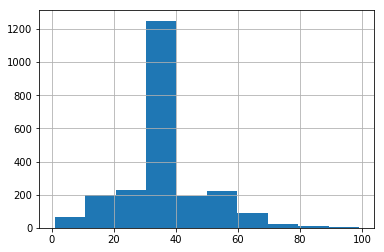

In [87]:
df['hours-per-week'].hist(bins=10)

In [88]:
df['hours-per-week'].isnull().sum()

10

In [89]:
df['hours-per-week'] = df['hours-per-week'].fillna(np.mean(df['hours-per-week']))

In [90]:
df['hours-per-week'] = df['hours-per-week'].round(2)

In [91]:
df

,Unnamed: 0,name,address,query hyperthyroid,T4U measured,FTI measured,lithium,TT4,T4U,capital-loss,capital-gain,query hypothyroid,on thyroxine,tumor,TSH,T3,fnlwgt,FTI,hours-per-week,sick,thyroid surgery,workclass,I131 treatment,TT4 measured,class,goitre,TSH measured,hypopituitary,query on thyroxine,personal_info,T3 measured,on antithyroid medication,referral source,education-num,psych,occupation,TBG measured,TBG,pregnant
0,0,Dora Richard,"91737 Francis Valley\nWest Richard, AK 77876",f,t,t,f,118.00,0.88,0.0,0.0,f,f,f,0.88,0.88,360593.0,135.000000,30.00,f,f,private,f,t,negative._552,f,t,f,f,Black|United-States\nHS-grad -- Divorced|Unmar...,t,f,SVI,9.0,f,Sales,f,?,f
1,1,Pamela Foote,"79316 Roberts Streets\nWest Williamfurt, ME 99813",f,t,t,f,122.00,1.05,0.0,2202.0,f,f,t,1.05,1.05,195329.0,116.000000,35.00,f,f,private,f,t,negative.|460,f,t,f,f,White|Italy\nHS-grad -- Widowed|Not-in-family,t,f,SVI,9.0,f,Other-service,f,?,f
2,2,Walter Jordan,"74254 Joseph Dam Suite 042\nAndersonchester, S...",f,t,t,f,93.00,0.86,0.0,0.0,f,f,f,0.86,0.86,98776.0,109.000000,30.00,f,f,private,f,t,negative._1324,f,t,f,f,White|United-States\nSome-college -- Never-mar...,t,f,other,10.0,f,Adm-clerical,f,?,f
3,3,Terry Mcbain,2786 Kimberly Greens Suite 871\nNew Reginaldsi...,f,t,t,f,101.00,0.94,0.0,7688.0,f,f,f,0.94,0.94,274683.0,108.000000,50.00,f,f,self-emp-not-inc,f,t,negative.|2187,f,t,f,f,White|United-States\nSome-college -- Married-c...,t,FALSE,SVI,10.0,f,Sales,f,?,f
4,4,Perla Mclean,"171 Rachel Lodge\nEast Michael, HI 44722",f,t,t,f,103.00,1.31,0.0,0.0,f,f,f,1.31,1.31,323619.0,76.000000,40.00,f,f,private,f,t,negative.|975,f,t,f,f,White|United-States\nSome-college -- Never-mar...,t,f,other,10.0,f,Adm-clerical,f,?,f
5,5,Edward Odom,"7316 Adams Crossing Apt. 148\nSaraport, IN 20516",f,t,t,f,100.00,1.07,0.0,0.0,f,f,f,1.07,1.07,162923.0,93.000000,60.00,f,f,self-emp-not-inc,t,t,negative.|2856,f,t,f,f,White|United-States\nHS-grad -- Married-civ-sp...,t,f,other,9.0,f,Craft-repair,f,?,f
6,6,Troy Noyer,"6364 Crawford Ways Apt. 844\nSouth Lauraland, ...",f,f,f,f,169.00,0.99,0.0,0.0,f,f,f,0.99,0.99,436798.0,111.891192,40.00,f,f,private,f,t,negative.|2886,f,t,f,f,White|United-States\nSome-college -- Married-c...,t,f,other,10.0,f,Machine-op-inspct,f,?,f
7,7,Coletta Holladay,"169 Yesenia Circle\nMichaelberg, OK 75412",f,t,t,f,72.00,1.05,0.0,0.0,f,f,f,1.05,1.05,211028.0,71.000000,40.00,f,f,private,f,t,negative.|155,f,t,f,f,White|United-States\nSome-college -- Never-mar...,t,f,other,10.0,f,Adm-clerical,f,?,f
8,8,Kathryn Woodard,Unit 1940 Box 8387\nDPO AA 25365,t,f,f,f,110.06,0.99,0.0,0.0,f,f,f,0.99,0.99,191451.0,111.891192,60.00,f,f,private,f,f,negative.|1856,f,f,f,f,Black|United-States\nMasters -- Divorced|Unmar...,t,f,other,14.0,f,Exec-managerial,f,?,f
9,9,Alyce Parlato,"2427 David Dale Suite 975\nNew Loriton, MN 87110",f,t,t,f,63.00,1.08,0.0,7688.0,t,t,f,1.08,1.08,167497.0,71.000000,50.00,f,f,private,f,t,negative.|2175,f,t,f,f,White|United-States\nSome-college -- Married-c...,t,f,other,10.0,f,Exec-managerial,f,?,f


## Úprava dát

#### Odstránime zbytočný znak v address

In [92]:
df['address'] = df['address'].str.replace('\n',', ')
df

,Unnamed: 0,name,address,query hyperthyroid,T4U measured,FTI measured,lithium,TT4,T4U,capital-loss,capital-gain,query hypothyroid,on thyroxine,tumor,TSH,T3,fnlwgt,FTI,hours-per-week,sick,thyroid surgery,workclass,I131 treatment,TT4 measured,class,goitre,TSH measured,hypopituitary,query on thyroxine,personal_info,T3 measured,on antithyroid medication,referral source,education-num,psych,occupation,TBG measured,TBG,pregnant
0,0,Dora Richard,"91737 Francis Valley, West Richard, AK 77876",f,t,t,f,118.00,0.88,0.0,0.0,f,f,f,0.88,0.88,360593.0,135.000000,30.00,f,f,private,f,t,negative._552,f,t,f,f,Black|United-States\nHS-grad -- Divorced|Unmar...,t,f,SVI,9.0,f,Sales,f,?,f
1,1,Pamela Foote,"79316 Roberts Streets, West Williamfurt, ME 99813",f,t,t,f,122.00,1.05,0.0,2202.0,f,f,t,1.05,1.05,195329.0,116.000000,35.00,f,f,private,f,t,negative.|460,f,t,f,f,White|Italy\nHS-grad -- Widowed|Not-in-family,t,f,SVI,9.0,f,Other-service,f,?,f
2,2,Walter Jordan,"74254 Joseph Dam Suite 042, Andersonchester, S...",f,t,t,f,93.00,0.86,0.0,0.0,f,f,f,0.86,0.86,98776.0,109.000000,30.00,f,f,private,f,t,negative._1324,f,t,f,f,White|United-States\nSome-college -- Never-mar...,t,f,other,10.0,f,Adm-clerical,f,?,f
3,3,Terry Mcbain,"2786 Kimberly Greens Suite 871, New Reginaldsi...",f,t,t,f,101.00,0.94,0.0,7688.0,f,f,f,0.94,0.94,274683.0,108.000000,50.00,f,f,self-emp-not-inc,f,t,negative.|2187,f,t,f,f,White|United-States\nSome-college -- Married-c...,t,FALSE,SVI,10.0,f,Sales,f,?,f
4,4,Perla Mclean,"171 Rachel Lodge, East Michael, HI 44722",f,t,t,f,103.00,1.31,0.0,0.0,f,f,f,1.31,1.31,323619.0,76.000000,40.00,f,f,private,f,t,negative.|975,f,t,f,f,White|United-States\nSome-college -- Never-mar...,t,f,other,10.0,f,Adm-clerical,f,?,f
5,5,Edward Odom,"7316 Adams Crossing Apt. 148, Saraport, IN 20516",f,t,t,f,100.00,1.07,0.0,0.0,f,f,f,1.07,1.07,162923.0,93.000000,60.00,f,f,self-emp-not-inc,t,t,negative.|2856,f,t,f,f,White|United-States\nHS-grad -- Married-civ-sp...,t,f,other,9.0,f,Craft-repair,f,?,f
6,6,Troy Noyer,"6364 Crawford Ways Apt. 844, South Lauraland, ...",f,f,f,f,169.00,0.99,0.0,0.0,f,f,f,0.99,0.99,436798.0,111.891192,40.00,f,f,private,f,t,negative.|2886,f,t,f,f,White|United-States\nSome-college -- Married-c...,t,f,other,10.0,f,Machine-op-inspct,f,?,f
7,7,Coletta Holladay,"169 Yesenia Circle, Michaelberg, OK 75412",f,t,t,f,72.00,1.05,0.0,0.0,f,f,f,1.05,1.05,211028.0,71.000000,40.00,f,f,private,f,t,negative.|155,f,t,f,f,White|United-States\nSome-college -- Never-mar...,t,f,other,10.0,f,Adm-clerical,f,?,f
8,8,Kathryn Woodard,"Unit 1940 Box 8387, DPO AA 25365",t,f,f,f,110.06,0.99,0.0,0.0,f,f,f,0.99,0.99,191451.0,111.891192,60.00,f,f,private,f,f,negative.|1856,f,f,f,f,Black|United-States\nMasters -- Divorced|Unmar...,t,f,other,14.0,f,Exec-managerial,f,?,f
9,9,Alyce Parlato,"2427 David Dale Suite 975, New Loriton, MN 87110",f,t,t,f,63.00,1.08,0.0,7688.0,t,t,f,1.08,1.08,167497.0,71.000000,50.00,f,f,private,f,t,negative.|2175,f,t,f,f,White|United-States\nSome-college -- Married-c...,t,f,other,10.0,f,Exec-managerial,f,?,f


#### V atribútoch, kde sa nachádzajú true/false hodnoty zjednotíme dané hodnoty.

In [93]:
s = (df.eq('t') | df.eq('f')).any()
pole = s[s].index.values
pole

array(['query hyperthyroid', 'T4U measured', 'FTI measured', 'lithium',
       'query hypothyroid', 'on thyroxine', 'tumor', 'sick',
       'thyroid surgery', 'I131 treatment', 'TT4 measured', 'goitre',
       'TSH measured', 'hypopituitary', 'query on thyroxine',
       'T3 measured', 'on antithyroid medication', 'psych',
       'TBG measured', 'pregnant'], dtype=object)

In [94]:
def true_false_zjednotenie(column):
    df[column] = df[column].replace('f..','f', regex = True)
    df[column] = df[column].replace('t..','t', regex = True)
    df[column] = df[column].replace('t.','t', regex = True)
    df[column] = df[column].replace('f.','f', regex = True)
    df[column] = df[column].replace('TRUE','t', regex = True)
    df[column] = df[column].replace('True','t', regex = True)
    df[column] = df[column].replace('true','t', regex = True)
    df[column] = df[column].replace('FALSE','f', regex = True)
    df[column] = df[column].replace('False','f', regex = True)
    df[column] = df[column].replace('false','f', regex = True)
    df[column] = df[column].replace('F','f', regex = True)
    df[column] = df[column].replace('T','f', regex = True)

In [95]:
#nefunguje
def true_false_zjednoteniee(column):
    if df[column].str.contains('t', case=False, regex=False):
        df[column] = 't'
    else:
        df[column] = 'f'

In [96]:
length = len(pole)
length
for i in range(length):
    true_false_zjednotenie(pole[i])

In [97]:
df

,Unnamed: 0,name,address,query hyperthyroid,T4U measured,FTI measured,lithium,TT4,T4U,capital-loss,capital-gain,query hypothyroid,on thyroxine,tumor,TSH,T3,fnlwgt,FTI,hours-per-week,sick,thyroid surgery,workclass,I131 treatment,TT4 measured,class,goitre,TSH measured,hypopituitary,query on thyroxine,personal_info,T3 measured,on antithyroid medication,referral source,education-num,psych,occupation,TBG measured,TBG,pregnant
0,0,Dora Richard,"91737 Francis Valley, West Richard, AK 77876",f,t,t,f,118.00,0.88,0.0,0.0,f,f,f,0.88,0.88,360593.0,135.000000,30.00,f,f,private,f,t,negative._552,f,t,f,f,Black|United-States\nHS-grad -- Divorced|Unmar...,t,f,SVI,9.0,f,Sales,f,?,f
1,1,Pamela Foote,"79316 Roberts Streets, West Williamfurt, ME 99813",f,t,t,f,122.00,1.05,0.0,2202.0,f,f,t,1.05,1.05,195329.0,116.000000,35.00,f,f,private,f,t,negative.|460,f,t,f,f,White|Italy\nHS-grad -- Widowed|Not-in-family,t,f,SVI,9.0,f,Other-service,f,?,f
2,2,Walter Jordan,"74254 Joseph Dam Suite 042, Andersonchester, S...",f,t,t,f,93.00,0.86,0.0,0.0,f,f,f,0.86,0.86,98776.0,109.000000,30.00,f,f,private,f,t,negative._1324,f,t,f,f,White|United-States\nSome-college -- Never-mar...,t,f,other,10.0,f,Adm-clerical,f,?,f
3,3,Terry Mcbain,"2786 Kimberly Greens Suite 871, New Reginaldsi...",f,t,t,f,101.00,0.94,0.0,7688.0,f,f,f,0.94,0.94,274683.0,108.000000,50.00,f,f,self-emp-not-inc,f,t,negative.|2187,f,t,f,f,White|United-States\nSome-college -- Married-c...,t,f,SVI,10.0,f,Sales,f,?,f
4,4,Perla Mclean,"171 Rachel Lodge, East Michael, HI 44722",f,t,t,f,103.00,1.31,0.0,0.0,f,f,f,1.31,1.31,323619.0,76.000000,40.00,f,f,private,f,t,negative.|975,f,t,f,f,White|United-States\nSome-college -- Never-mar...,t,f,other,10.0,f,Adm-clerical,f,?,f
5,5,Edward Odom,"7316 Adams Crossing Apt. 148, Saraport, IN 20516",f,t,t,f,100.00,1.07,0.0,0.0,f,f,f,1.07,1.07,162923.0,93.000000,60.00,f,f,self-emp-not-inc,t,t,negative.|2856,f,t,f,f,White|United-States\nHS-grad -- Married-civ-sp...,t,f,other,9.0,f,Craft-repair,f,?,f
6,6,Troy Noyer,"6364 Crawford Ways Apt. 844, South Lauraland, ...",f,f,f,f,169.00,0.99,0.0,0.0,f,f,f,0.99,0.99,436798.0,111.891192,40.00,f,f,private,f,t,negative.|2886,f,t,f,f,White|United-States\nSome-college -- Married-c...,t,f,other,10.0,f,Machine-op-inspct,f,?,f
7,7,Coletta Holladay,"169 Yesenia Circle, Michaelberg, OK 75412",f,t,t,f,72.00,1.05,0.0,0.0,f,f,f,1.05,1.05,211028.0,71.000000,40.00,f,f,private,f,t,negative.|155,f,t,f,f,White|United-States\nSome-college -- Never-mar...,t,f,other,10.0,f,Adm-clerical,f,?,f
8,8,Kathryn Woodard,"Unit 1940 Box 8387, DPO AA 25365",t,f,f,f,110.06,0.99,0.0,0.0,f,f,f,0.99,0.99,191451.0,111.891192,60.00,f,f,private,f,f,negative.|1856,f,f,f,f,Black|United-States\nMasters -- Divorced|Unmar...,t,f,other,14.0,f,Exec-managerial,f,?,f
9,9,Alyce Parlato,"2427 David Dale Suite 975, New Loriton, MN 87110",f,t,t,f,63.00,1.08,0.0,7688.0,t,t,f,1.08,1.08,167497.0,71.000000,50.00,f,f,private,f,t,negative.|2175,f,t,f,f,White|United-States\nSome-college -- Married-c...,t,f,other,10.0,f,Exec-managerial,f,?,f


### Spojíme atribúty capital-loss a capital-gain, predtým ešte vyplníme chýbajúce hodnoty nulou

In [98]:
df['capital-gain'].fillna(0)
df['capital-loss'].fillna(0)

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
5          0.0
6          0.0
7          0.0
8          0.0
9          0.0
10         0.0
11         0.0
12         0.0
13         0.0
14      1602.0
15         0.0
16         0.0
17         0.0
18         0.0
19         0.0
20       880.0
21         0.0
22         0.0
23         0.0
24         0.0
25         0.0
26         0.0
27         0.0
28         0.0
29         0.0
30         0.0
31         0.0
32         0.0
33         0.0
34         0.0
35         0.0
36         0.0
37         0.0
38         0.0
39         0.0
40         0.0
41         0.0
42         0.0
43         0.0
44         0.0
45         0.0
46         0.0
47         0.0
48         0.0
49         0.0
         ...  
2237       0.0
2238       0.0
2239       0.0
2240       0.0
2241       0.0
2242       0.0
2243       0.0
2244    1669.0
2245       0.0
2246       0.0
2247       0.0
2248       0.0
2249       0.0
2250       0.0
2251       0.0
2252      

In [99]:
df['capital-gain'] = df['capital-gain'] - df['capital-loss']

In [100]:
del df['capital-loss']

### Odstránime stĺpec fnlwgt, ktorého hodnoty nám nič nehovoria a taktiež TBG, hypopituitary a TBG measured, kde niesú prakticky žiadne hodnoty

In [101]:
del df['fnlwgt']
del df['TBG']
del df['TBG measured']
del df['hypopituitary']

In [102]:
df

,Unnamed: 0,name,address,query hyperthyroid,T4U measured,FTI measured,lithium,TT4,T4U,capital-gain,query hypothyroid,on thyroxine,tumor,TSH,T3,FTI,hours-per-week,sick,thyroid surgery,workclass,I131 treatment,TT4 measured,class,goitre,TSH measured,query on thyroxine,personal_info,T3 measured,on antithyroid medication,referral source,education-num,psych,occupation,pregnant
0,0,Dora Richard,"91737 Francis Valley, West Richard, AK 77876",f,t,t,f,118.00,0.88,0.0,f,f,f,0.88,0.88,135.000000,30.00,f,f,private,f,t,negative._552,f,t,f,Black|United-States\nHS-grad -- Divorced|Unmar...,t,f,SVI,9.0,f,Sales,f
1,1,Pamela Foote,"79316 Roberts Streets, West Williamfurt, ME 99813",f,t,t,f,122.00,1.05,2202.0,f,f,t,1.05,1.05,116.000000,35.00,f,f,private,f,t,negative.|460,f,t,f,White|Italy\nHS-grad -- Widowed|Not-in-family,t,f,SVI,9.0,f,Other-service,f
2,2,Walter Jordan,"74254 Joseph Dam Suite 042, Andersonchester, S...",f,t,t,f,93.00,0.86,0.0,f,f,f,0.86,0.86,109.000000,30.00,f,f,private,f,t,negative._1324,f,t,f,White|United-States\nSome-college -- Never-mar...,t,f,other,10.0,f,Adm-clerical,f
3,3,Terry Mcbain,"2786 Kimberly Greens Suite 871, New Reginaldsi...",f,t,t,f,101.00,0.94,7688.0,f,f,f,0.94,0.94,108.000000,50.00,f,f,self-emp-not-inc,f,t,negative.|2187,f,t,f,White|United-States\nSome-college -- Married-c...,t,f,SVI,10.0,f,Sales,f
4,4,Perla Mclean,"171 Rachel Lodge, East Michael, HI 44722",f,t,t,f,103.00,1.31,0.0,f,f,f,1.31,1.31,76.000000,40.00,f,f,private,f,t,negative.|975,f,t,f,White|United-States\nSome-college -- Never-mar...,t,f,other,10.0,f,Adm-clerical,f
5,5,Edward Odom,"7316 Adams Crossing Apt. 148, Saraport, IN 20516",f,t,t,f,100.00,1.07,0.0,f,f,f,1.07,1.07,93.000000,60.00,f,f,self-emp-not-inc,t,t,negative.|2856,f,t,f,White|United-States\nHS-grad -- Married-civ-sp...,t,f,other,9.0,f,Craft-repair,f
6,6,Troy Noyer,"6364 Crawford Ways Apt. 844, South Lauraland, ...",f,f,f,f,169.00,0.99,0.0,f,f,f,0.99,0.99,111.891192,40.00,f,f,private,f,t,negative.|2886,f,t,f,White|United-States\nSome-college -- Married-c...,t,f,other,10.0,f,Machine-op-inspct,f
7,7,Coletta Holladay,"169 Yesenia Circle, Michaelberg, OK 75412",f,t,t,f,72.00,1.05,0.0,f,f,f,1.05,1.05,71.000000,40.00,f,f,private,f,t,negative.|155,f,t,f,White|United-States\nSome-college -- Never-mar...,t,f,other,10.0,f,Adm-clerical,f
8,8,Kathryn Woodard,"Unit 1940 Box 8387, DPO AA 25365",t,f,f,f,110.06,0.99,0.0,f,f,f,0.99,0.99,111.891192,60.00,f,f,private,f,f,negative.|1856,f,f,f,Black|United-States\nMasters -- Divorced|Unmar...,t,f,other,14.0,f,Exec-managerial,f
9,9,Alyce Parlato,"2427 David Dale Suite 975, New Loriton, MN 87110",f,t,t,f,63.00,1.08,7688.0,t,t,f,1.08,1.08,71.000000,50.00,f,f,private,f,t,negative.|2175,f,t,f,White|United-States\nSome-college -- Married-c...,t,f,other,10.0,f,Exec-managerial,f


### Podľa predchádzajúcej analýzy odstránime čísla z class hodnôt

In [103]:
df['class'] = df['class'].str.split('.').str[0]

In [104]:
df

,Unnamed: 0,name,address,query hyperthyroid,T4U measured,FTI measured,lithium,TT4,T4U,capital-gain,query hypothyroid,on thyroxine,tumor,TSH,T3,FTI,hours-per-week,sick,thyroid surgery,workclass,I131 treatment,TT4 measured,class,goitre,TSH measured,query on thyroxine,personal_info,T3 measured,on antithyroid medication,referral source,education-num,psych,occupation,pregnant
0,0,Dora Richard,"91737 Francis Valley, West Richard, AK 77876",f,t,t,f,118.00,0.88,0.0,f,f,f,0.88,0.88,135.000000,30.00,f,f,private,f,t,negative,f,t,f,Black|United-States\nHS-grad -- Divorced|Unmar...,t,f,SVI,9.0,f,Sales,f
1,1,Pamela Foote,"79316 Roberts Streets, West Williamfurt, ME 99813",f,t,t,f,122.00,1.05,2202.0,f,f,t,1.05,1.05,116.000000,35.00,f,f,private,f,t,negative,f,t,f,White|Italy\nHS-grad -- Widowed|Not-in-family,t,f,SVI,9.0,f,Other-service,f
2,2,Walter Jordan,"74254 Joseph Dam Suite 042, Andersonchester, S...",f,t,t,f,93.00,0.86,0.0,f,f,f,0.86,0.86,109.000000,30.00,f,f,private,f,t,negative,f,t,f,White|United-States\nSome-college -- Never-mar...,t,f,other,10.0,f,Adm-clerical,f
3,3,Terry Mcbain,"2786 Kimberly Greens Suite 871, New Reginaldsi...",f,t,t,f,101.00,0.94,7688.0,f,f,f,0.94,0.94,108.000000,50.00,f,f,self-emp-not-inc,f,t,negative,f,t,f,White|United-States\nSome-college -- Married-c...,t,f,SVI,10.0,f,Sales,f
4,4,Perla Mclean,"171 Rachel Lodge, East Michael, HI 44722",f,t,t,f,103.00,1.31,0.0,f,f,f,1.31,1.31,76.000000,40.00,f,f,private,f,t,negative,f,t,f,White|United-States\nSome-college -- Never-mar...,t,f,other,10.0,f,Adm-clerical,f
5,5,Edward Odom,"7316 Adams Crossing Apt. 148, Saraport, IN 20516",f,t,t,f,100.00,1.07,0.0,f,f,f,1.07,1.07,93.000000,60.00,f,f,self-emp-not-inc,t,t,negative,f,t,f,White|United-States\nHS-grad -- Married-civ-sp...,t,f,other,9.0,f,Craft-repair,f
6,6,Troy Noyer,"6364 Crawford Ways Apt. 844, South Lauraland, ...",f,f,f,f,169.00,0.99,0.0,f,f,f,0.99,0.99,111.891192,40.00,f,f,private,f,t,negative,f,t,f,White|United-States\nSome-college -- Married-c...,t,f,other,10.0,f,Machine-op-inspct,f
7,7,Coletta Holladay,"169 Yesenia Circle, Michaelberg, OK 75412",f,t,t,f,72.00,1.05,0.0,f,f,f,1.05,1.05,71.000000,40.00,f,f,private,f,t,negative,f,t,f,White|United-States\nSome-college -- Never-mar...,t,f,other,10.0,f,Adm-clerical,f
8,8,Kathryn Woodard,"Unit 1940 Box 8387, DPO AA 25365",t,f,f,f,110.06,0.99,0.0,f,f,f,0.99,0.99,111.891192,60.00,f,f,private,f,f,negative,f,f,f,Black|United-States\nMasters -- Divorced|Unmar...,t,f,other,14.0,f,Exec-managerial,f
9,9,Alyce Parlato,"2427 David Dale Suite 975, New Loriton, MN 87110",f,t,t,f,63.00,1.08,7688.0,t,t,f,1.08,1.08,71.000000,50.00,f,f,private,f,t,negative,f,t,f,White|United-States\nSome-college -- Married-c...,t,f,other,10.0,f,Exec-managerial,f


In [105]:
df['personal_info'] = df['personal_info'].str.replace('\n','|')
df['personal_info'] = df['personal_info'].str.replace(' -- ','|')

In [106]:
df

,Unnamed: 0,name,address,query hyperthyroid,T4U measured,FTI measured,lithium,TT4,T4U,capital-gain,query hypothyroid,on thyroxine,tumor,TSH,T3,FTI,hours-per-week,sick,thyroid surgery,workclass,I131 treatment,TT4 measured,class,goitre,TSH measured,query on thyroxine,personal_info,T3 measured,on antithyroid medication,referral source,education-num,psych,occupation,pregnant
0,0,Dora Richard,"91737 Francis Valley, West Richard, AK 77876",f,t,t,f,118.00,0.88,0.0,f,f,f,0.88,0.88,135.000000,30.00,f,f,private,f,t,negative,f,t,f,Black|United-States|HS-grad|Divorced|Unmarried,t,f,SVI,9.0,f,Sales,f
1,1,Pamela Foote,"79316 Roberts Streets, West Williamfurt, ME 99813",f,t,t,f,122.00,1.05,2202.0,f,f,t,1.05,1.05,116.000000,35.00,f,f,private,f,t,negative,f,t,f,White|Italy|HS-grad|Widowed|Not-in-family,t,f,SVI,9.0,f,Other-service,f
2,2,Walter Jordan,"74254 Joseph Dam Suite 042, Andersonchester, S...",f,t,t,f,93.00,0.86,0.0,f,f,f,0.86,0.86,109.000000,30.00,f,f,private,f,t,negative,f,t,f,White|United-States|Some-college|Never-married...,t,f,other,10.0,f,Adm-clerical,f
3,3,Terry Mcbain,"2786 Kimberly Greens Suite 871, New Reginaldsi...",f,t,t,f,101.00,0.94,7688.0,f,f,f,0.94,0.94,108.000000,50.00,f,f,self-emp-not-inc,f,t,negative,f,t,f,White|United-States|Some-college|Married-civ-s...,t,f,SVI,10.0,f,Sales,f
4,4,Perla Mclean,"171 Rachel Lodge, East Michael, HI 44722",f,t,t,f,103.00,1.31,0.0,f,f,f,1.31,1.31,76.000000,40.00,f,f,private,f,t,negative,f,t,f,White|United-States|Some-college|Never-married...,t,f,other,10.0,f,Adm-clerical,f
5,5,Edward Odom,"7316 Adams Crossing Apt. 148, Saraport, IN 20516",f,t,t,f,100.00,1.07,0.0,f,f,f,1.07,1.07,93.000000,60.00,f,f,self-emp-not-inc,t,t,negative,f,t,f,White|United-States|HS-grad|Married-civ-spouse...,t,f,other,9.0,f,Craft-repair,f
6,6,Troy Noyer,"6364 Crawford Ways Apt. 844, South Lauraland, ...",f,f,f,f,169.00,0.99,0.0,f,f,f,0.99,0.99,111.891192,40.00,f,f,private,f,t,negative,f,t,f,White|United-States|Some-college|Married-civ-s...,t,f,other,10.0,f,Machine-op-inspct,f
7,7,Coletta Holladay,"169 Yesenia Circle, Michaelberg, OK 75412",f,t,t,f,72.00,1.05,0.0,f,f,f,1.05,1.05,71.000000,40.00,f,f,private,f,t,negative,f,t,f,White|United-States|Some-college|Never-married...,t,f,other,10.0,f,Adm-clerical,f
8,8,Kathryn Woodard,"Unit 1940 Box 8387, DPO AA 25365",t,f,f,f,110.06,0.99,0.0,f,f,f,0.99,0.99,111.891192,60.00,f,f,private,f,f,negative,f,f,f,Black|United-States|Masters|Divorced|Unmarried,t,f,other,14.0,f,Exec-managerial,f
9,9,Alyce Parlato,"2427 David Dale Suite 975, New Loriton, MN 87110",f,t,t,f,63.00,1.08,7688.0,t,t,f,1.08,1.08,71.000000,50.00,f,f,private,f,t,negative,f,t,f,White|United-States|Some-college|Married-civ-s...,t,f,other,10.0,f,Exec-managerial,f


#### Vytvorenie nových atribútov z personal_info, poslednú časť vynecháme, je to len duplikácia informácie o rodinnom stave

In [107]:
df['Race'] = df['personal_info'].str.split('|').str[0]
df['Country'] = df['personal_info'].str.split('|').str[1]
df['Education']  = df['personal_info'].str.split('|').str[2]
df['Family status'] = df['personal_info'].str.split('|').str[3]

In [108]:
del df['personal_info']

In [109]:
education = pd.crosstab(index=df['education-num'], columns=df['Education'], margins=True)
education

Education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,All
education-num,,,,,,,,,,,,,,,,,
-1600.0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2
-1400.0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,8
-1300.0,0,0,0,0,0,0,0,0,0,17,0,0,0,0,0,0,17
-1200.0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,5
-1100.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
-1000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,18
-900.0,0,0,0,0,0,0,0,0,0,0,0,33,0,0,0,0,33
-800.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
-700.0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6


Zistili sme, že tu niesú náhodné hodnoty, ale -/+ 1600 je 16 atď.

In [110]:
df['education-num'] = abs(df['education-num'])

In [111]:
df['education-num'] = df['education-num'].apply(lambda x: x/100 if x> 16 else x)

In [112]:
df['education-num'].value_counts()

9.0     712
10.0    545
13.0    382
14.0    121
7.0     100
11.0     87
12.0     78
6.0      77
4.0      37
16.0     29
8.0      28
5.0      25
15.0     23
3.0      20
1.0       8
2.0       5
Name: education-num, dtype: int64

In [113]:
df['Education'].isnull().sum()

7

Vidíme menší počet riadkov, kde nieje hodnota Education. Doplníme ju najčastejšou hodnotou.

In [114]:
pd.Series(df['Education']).fillna(df['Education'].value_counts().idxmax(),inplace=True)

In [115]:
df['education-num'].isnull().sum()

10

In [116]:
df['education-num'] = pd.Series(df['education-num']).fillna('?')

In [117]:
dict = {}

for i in range(len(df['education-num'])):
    if df['education-num'][i] != '?':
        dict[df['Education'][i]]=[df['education-num'][i]]

In [118]:
dict

{'HS-grad': [9.0],
 'Some-college': [10.0],
 'Masters': [14.0],
 'Bachelors': [13.0],
 '7th-8th': [4.0],
 'Assoc-acdm': [12.0],
 '11th': [7.0],
 '10th': [6.0],
 '9th': [5.0],
 'Prof-school': [15.0],
 '12th': [8.0],
 'Assoc-voc': [11.0],
 'Doctorate': [16.0],
 '5th-6th': [3.0],
 'Preschool': [1.0],
 '1st-4th': [2.0]}

In [122]:
df['education-num'] = df['education-num'].replace('?',df['Education'].map(dict))

In [123]:
df['education-num'].isnull().sum()

0

In [124]:
education_num_assertion = pd.crosstab(index=df['Education'],columns=df['education-num'], margins=True)
education_num_assertion

education-num,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,All
Education,,,,,,,,,,,,,,,,,
10th,0,0,0,0,0,77,0,0,0,0,0,0,0,0,0,0,77
11th,0,0,0,0,0,0,101,0,0,0,0,0,0,0,0,0,101
12th,0,0,0,0,0,0,0,28,0,0,0,0,0,0,0,0,28
1st-4th,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
5th-6th,0,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,20
7th-8th,0,0,0,37,0,0,0,0,0,0,0,0,0,0,0,0,37
9th,0,0,0,0,25,0,0,0,0,0,0,0,0,0,0,0,25
Assoc-acdm,0,0,0,0,0,0,0,0,0,0,0,79,0,0,0,0,79
Assoc-voc,0,0,0,0,0,0,0,0,0,0,88,0,0,0,0,0,88


In [125]:
df.to_csv('Data.csv')

In [126]:
df2 = pd.read_csv("Data.csv", index_col=0)

## Zjednotenie dátového formátu

## Spojenie datasetov a odstránenie duplicít

In [127]:
personal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 6 columns):
Unnamed: 0       2237 non-null int64
name             2237 non-null object
address          2237 non-null object
age              2236 non-null float64
sex              2237 non-null object
date_of_birth    2236 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 104.9+ KB


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2287 entries, 0 to 2286
Data columns (total 37 columns):
Unnamed: 0                   2287 non-null int64
name                         2287 non-null object
address                      2287 non-null object
query hyperthyroid           2287 non-null object
T4U measured                 2287 non-null object
FTI measured                 2287 non-null object
lithium                      2287 non-null object
TT4                          2287 non-null float64
T4U                          2287 non-null float64
capital-gain                 2048 non-null float64
query hypothyroid            2287 non-null object
on thyroxine                 2287 non-null object
tumor                        2287 non-null object
TSH                          2287 non-null float64
T3                           2287 non-null float64
FTI                          2287 non-null float64
hours-per-week               2287 non-null float64
sick                         2287 non

In [129]:
df['capital-gain'] = df['capital-gain'].fillna(0)

In [130]:
Dupl = df.groupby(['name', 'address']).size().reset_index(name='QTY')
SortDupl = Dupl.sort_values('QTY', ascending=False)
Dup = SortDupl[SortDupl.QTY > 1]
Dup.shape[0]

50

#### Podľa predchádzajúcej analýzy vidíme, že v personal datasete je o 50 riadkov menej. To je aj počet duplicít v druhom datasete.

### Zjednotenie datasetov, doplnia sa nám ďalšie stĺpce

In [131]:
personal_df['address'] = personal_df['address'].str.replace('\n',', ')

In [132]:
DataMerge = df.drop_duplicates(subset=['name', 'address'])

In [133]:
DataMerge.shape[0]

2237

#### Po odstránení duplikátov v prvom datasete dostávame 2237 riadkov

In [134]:
DataMerged = pd.merge(df, personal_df, on=['name','address'])

In [135]:
personal_df.shape[0]

2237

#### To je aj rovnaký počet riadkov v personal datasete.

In [136]:
DataMerged.shape[0] 

2287

In [137]:
DataMergedd = DataMerged .drop_duplicates(subset=['name', 'address'])

In [138]:
DataMergedd.shape[0]

2237

#### Po zjednotení ale vzniknú ďaľšie duplikáty, tak ich tiež odstránime.

#### Odstránenie zbytočných riadkov

In [139]:
del DataMergedd['Unnamed: 0_x']
del DataMergedd['Unnamed: 0_y']

In [140]:
DataMergedd.shape[0]

2237

In [141]:
DataMergedd

,name,address,query hyperthyroid,T4U measured,FTI measured,lithium,TT4,T4U,capital-gain,query hypothyroid,on thyroxine,tumor,TSH,T3,FTI,hours-per-week,sick,thyroid surgery,workclass,I131 treatment,TT4 measured,class,goitre,TSH measured,query on thyroxine,T3 measured,on antithyroid medication,referral source,education-num,psych,occupation,pregnant,Race,Country,Education,Family status,age,sex,date_of_birth
0,Dora Richard,"91737 Francis Valley, West Richard, AK 77876",f,t,t,f,118.00,0.88,0.0,f,f,f,0.88,0.88,135.000000,30.00,f,f,private,f,t,negative,f,t,f,t,f,SVI,9.0,f,Sales,f,Black,United-States,HS-grad,Divorced,78.0,F,39-12-11
1,Pamela Foote,"79316 Roberts Streets, West Williamfurt, ME 99813",f,t,t,f,122.00,1.05,2202.0,f,f,t,1.05,1.05,116.000000,35.00,f,f,private,f,t,negative,f,t,f,t,f,SVI,9.0,f,Other-service,f,White,Italy,HS-grad,Widowed,56.0,F,1961/12/04
2,Walter Jordan,"74254 Joseph Dam Suite 042, Andersonchester, S...",f,t,t,f,93.00,0.86,0.0,f,f,f,0.86,0.86,109.000000,30.00,f,f,private,f,t,negative,f,t,f,t,f,other,10.0,f,Adm-clerical,f,White,United-States,Some-college,Never-married,14.0,M,2004-04-10
3,Terry Mcbain,"2786 Kimberly Greens Suite 871, New Reginaldsi...",f,t,t,f,101.00,0.94,7688.0,f,f,f,0.94,0.94,108.000000,50.00,f,f,self-emp-not-inc,f,t,negative,f,t,f,t,f,SVI,10.0,f,Sales,f,White,United-States,Some-college,Married-civ-spouse,50.0,M,1968-05-23
4,Perla Mclean,"171 Rachel Lodge, East Michael, HI 44722",f,t,t,f,103.00,1.31,0.0,f,f,f,1.31,1.31,76.000000,40.00,f,f,private,f,t,negative,f,t,f,t,f,other,10.0,f,Adm-clerical,f,White,United-States,Some-college,Never-married,23.0,F,95-03-13
5,Edward Odom,"7316 Adams Crossing Apt. 148, Saraport, IN 20516",f,t,t,f,100.00,1.07,0.0,f,f,f,1.07,1.07,93.000000,60.00,f,f,self-emp-not-inc,t,t,negative,f,t,f,t,f,other,9.0,f,Craft-repair,f,White,United-States,HS-grad,Married-civ-spouse,74.0,?,1944-02-13
6,Troy Noyer,"6364 Crawford Ways Apt. 844, South Lauraland, ...",f,f,f,f,169.00,0.99,0.0,f,f,f,0.99,0.99,111.891192,40.00,f,f,private,f,t,negative,f,t,f,t,f,other,10.0,f,Machine-op-inspct,f,White,United-States,Some-college,Married-civ-spouse,28.0,M,1990-07-06
7,Coletta Holladay,"169 Yesenia Circle, Michaelberg, OK 75412",f,t,t,f,72.00,1.05,0.0,f,f,f,1.05,1.05,71.000000,40.00,f,f,private,f,t,negative,f,t,f,t,f,other,10.0,f,Adm-clerical,f,White,United-States,Some-college,Never-married,36.0,F,1982-09-19 00 00 00
8,Kathryn Woodard,"Unit 1940 Box 8387, DPO AA 25365",t,f,f,f,110.06,0.99,0.0,f,f,f,0.99,0.99,111.891192,60.00,f,f,private,f,f,negative,f,f,f,t,f,other,14.0,f,Exec-managerial,f,Black,United-States,Masters,Divorced,51.0,F,1966-11-05
9,Alyce Parlato,"2427 David Dale Suite 975, New Loriton, MN 87110",f,t,t,f,63.00,1.08,7688.0,t,t,f,1.08,1.08,71.000000,50.00,f,f,private,f,t,negative,f,t,f,t,f,other,10.0,f,Exec-managerial,f,White,United-States,Some-college,Married-civ-spouse,48.0,F,70-04-15


Vidíme, že je tu 2237 riadkov, číslovanie ale ukazuje 2287. Zrejme to ráta aj nejaké prázdne riadky. 

In [142]:
import random
ALL = DataMergedd['name'].shape[0]
ALL

2237

In [143]:
FEMALE = DataMergedd[DataMergedd['sex'] == 'F'].shape[0]
FEMALE = FEMALE/ALL

In [144]:
DataMergedd['sex'].value_counts()

F    1448
M     701
?      88
Name: sex, dtype: int64

In [145]:
DataMergedd['sex'][0]
DataMergedd = DataMergedd.reset_index(drop=True)

In [147]:

for i in range(len(DataMergedd)):
    if DataMergedd.loc[:,'sex'][i] == '?' :
        random_number = random.randint(0,101)
        random_number = random_number/100
        if random_number<=FEMALE:
            DataMergedd.loc[:,'sex'][i] = 'F'
        else:
            DataMergedd.loc[:,'sex'][i] = 'M'        

#### Doplnenie prázdnych hodnôt v pregnant s 'f'.

In [148]:
DataMergedd.loc[:,'pregnant'] = DataMergedd['pregnant'].fillna('f')

In [149]:
DataMergedd

,name,address,query hyperthyroid,T4U measured,FTI measured,lithium,TT4,T4U,capital-gain,query hypothyroid,on thyroxine,tumor,TSH,T3,FTI,hours-per-week,sick,thyroid surgery,workclass,I131 treatment,TT4 measured,class,goitre,TSH measured,query on thyroxine,T3 measured,on antithyroid medication,referral source,education-num,psych,occupation,pregnant,Race,Country,Education,Family status,age,sex,date_of_birth
0,Dora Richard,"91737 Francis Valley, West Richard, AK 77876",f,t,t,f,118.00,0.88,0.0,f,f,f,0.88,0.88,135.000000,30.00,f,f,private,f,t,negative,f,t,f,t,f,SVI,9.0,f,Sales,f,Black,United-States,HS-grad,Divorced,78.0,F,39-12-11
1,Pamela Foote,"79316 Roberts Streets, West Williamfurt, ME 99813",f,t,t,f,122.00,1.05,2202.0,f,f,t,1.05,1.05,116.000000,35.00,f,f,private,f,t,negative,f,t,f,t,f,SVI,9.0,f,Other-service,f,White,Italy,HS-grad,Widowed,56.0,F,1961/12/04
2,Walter Jordan,"74254 Joseph Dam Suite 042, Andersonchester, S...",f,t,t,f,93.00,0.86,0.0,f,f,f,0.86,0.86,109.000000,30.00,f,f,private,f,t,negative,f,t,f,t,f,other,10.0,f,Adm-clerical,f,White,United-States,Some-college,Never-married,14.0,M,2004-04-10
3,Terry Mcbain,"2786 Kimberly Greens Suite 871, New Reginaldsi...",f,t,t,f,101.00,0.94,7688.0,f,f,f,0.94,0.94,108.000000,50.00,f,f,self-emp-not-inc,f,t,negative,f,t,f,t,f,SVI,10.0,f,Sales,f,White,United-States,Some-college,Married-civ-spouse,50.0,M,1968-05-23
4,Perla Mclean,"171 Rachel Lodge, East Michael, HI 44722",f,t,t,f,103.00,1.31,0.0,f,f,f,1.31,1.31,76.000000,40.00,f,f,private,f,t,negative,f,t,f,t,f,other,10.0,f,Adm-clerical,f,White,United-States,Some-college,Never-married,23.0,F,95-03-13
5,Edward Odom,"7316 Adams Crossing Apt. 148, Saraport, IN 20516",f,t,t,f,100.00,1.07,0.0,f,f,f,1.07,1.07,93.000000,60.00,f,f,self-emp-not-inc,t,t,negative,f,t,f,t,f,other,9.0,f,Craft-repair,f,White,United-States,HS-grad,Married-civ-spouse,74.0,F,1944-02-13
6,Troy Noyer,"6364 Crawford Ways Apt. 844, South Lauraland, ...",f,f,f,f,169.00,0.99,0.0,f,f,f,0.99,0.99,111.891192,40.00,f,f,private,f,t,negative,f,t,f,t,f,other,10.0,f,Machine-op-inspct,f,White,United-States,Some-college,Married-civ-spouse,28.0,M,1990-07-06
7,Coletta Holladay,"169 Yesenia Circle, Michaelberg, OK 75412",f,t,t,f,72.00,1.05,0.0,f,f,f,1.05,1.05,71.000000,40.00,f,f,private,f,t,negative,f,t,f,t,f,other,10.0,f,Adm-clerical,f,White,United-States,Some-college,Never-married,36.0,F,1982-09-19 00 00 00
8,Kathryn Woodard,"Unit 1940 Box 8387, DPO AA 25365",t,f,f,f,110.06,0.99,0.0,f,f,f,0.99,0.99,111.891192,60.00,f,f,private,f,f,negative,f,f,f,t,f,other,14.0,f,Exec-managerial,f,Black,United-States,Masters,Divorced,51.0,F,1966-11-05
9,Alyce Parlato,"2427 David Dale Suite 975, New Loriton, MN 87110",f,t,t,f,63.00,1.08,7688.0,t,t,f,1.08,1.08,71.000000,50.00,f,f,private,f,t,negative,f,t,f,t,f,other,10.0,f,Exec-managerial,f,White,United-States,Some-college,Married-civ-spouse,48.0,F,70-04-15


In [ ]:
import dateparser as dp
for i in range(len(df)):
    if DataMergedd.loc[:,'date_of_birth'][i] != "":
        datum=str(DataMergedd['date_of_birth'][i])
        datum=datum.split(' ')
        result = str(dp.parse(datum[0]).date())
        DataMergedd.loc[:,'date_of_birth'][i] = result

In [151]:
DataMergedd.loc[:,'date_of_birth'] = DataMergedd.loc[:,'date_of_birth'].str.replace('/','-')

In [152]:
DataMergedd

,name,address,query hyperthyroid,T4U measured,FTI measured,lithium,TT4,T4U,capital-gain,query hypothyroid,on thyroxine,tumor,TSH,T3,FTI,hours-per-week,sick,thyroid surgery,workclass,I131 treatment,TT4 measured,class,goitre,TSH measured,query on thyroxine,T3 measured,on antithyroid medication,referral source,education-num,psych,occupation,pregnant,Race,Country,Education,Family status,age,sex,date_of_birth
0,Dora Richard,"91737 Francis Valley, West Richard, AK 77876",f,t,t,f,118.00,0.88,0.0,f,f,f,0.88,0.88,135.000000,30.00,f,f,private,f,t,negative,f,t,f,t,f,SVI,9.0,f,Sales,f,Black,United-States,HS-grad,Divorced,78.0,F,2039-12-11
1,Pamela Foote,"79316 Roberts Streets, West Williamfurt, ME 99813",f,t,t,f,122.00,1.05,2202.0,f,f,t,1.05,1.05,116.000000,35.00,f,f,private,f,t,negative,f,t,f,t,f,SVI,9.0,f,Other-service,f,White,Italy,HS-grad,Widowed,56.0,F,1961-12-04
2,Walter Jordan,"74254 Joseph Dam Suite 042, Andersonchester, S...",f,t,t,f,93.00,0.86,0.0,f,f,f,0.86,0.86,109.000000,30.00,f,f,private,f,t,negative,f,t,f,t,f,other,10.0,f,Adm-clerical,f,White,United-States,Some-college,Never-married,14.0,M,2004-04-10
3,Terry Mcbain,"2786 Kimberly Greens Suite 871, New Reginaldsi...",f,t,t,f,101.00,0.94,7688.0,f,f,f,0.94,0.94,108.000000,50.00,f,f,self-emp-not-inc,f,t,negative,f,t,f,t,f,SVI,10.0,f,Sales,f,White,United-States,Some-college,Married-civ-spouse,50.0,M,1968-05-23
4,Perla Mclean,"171 Rachel Lodge, East Michael, HI 44722",f,t,t,f,103.00,1.31,0.0,f,f,f,1.31,1.31,76.000000,40.00,f,f,private,f,t,negative,f,t,f,t,f,other,10.0,f,Adm-clerical,f,White,United-States,Some-college,Never-married,23.0,F,1995-03-13
5,Edward Odom,"7316 Adams Crossing Apt. 148, Saraport, IN 20516",f,t,t,f,100.00,1.07,0.0,f,f,f,1.07,1.07,93.000000,60.00,f,f,self-emp-not-inc,t,t,negative,f,t,f,t,f,other,9.0,f,Craft-repair,f,White,United-States,HS-grad,Married-civ-spouse,74.0,F,1944-02-13
6,Troy Noyer,"6364 Crawford Ways Apt. 844, South Lauraland, ...",f,f,f,f,169.00,0.99,0.0,f,f,f,0.99,0.99,111.891192,40.00,f,f,private,f,t,negative,f,t,f,t,f,other,10.0,f,Machine-op-inspct,f,White,United-States,Some-college,Married-civ-spouse,28.0,M,1990-07-06
7,Coletta Holladay,"169 Yesenia Circle, Michaelberg, OK 75412",f,t,t,f,72.00,1.05,0.0,f,f,f,1.05,1.05,71.000000,40.00,f,f,private,f,t,negative,f,t,f,t,f,other,10.0,f,Adm-clerical,f,White,United-States,Some-college,Never-married,36.0,F,1982-09-19
8,Kathryn Woodard,"Unit 1940 Box 8387, DPO AA 25365",t,f,f,f,110.06,0.99,0.0,f,f,f,0.99,0.99,111.891192,60.00,f,f,private,f,f,negative,f,f,f,t,f,other,14.0,f,Exec-managerial,f,Black,United-States,Masters,Divorced,51.0,F,1966-11-05
9,Alyce Parlato,"2427 David Dale Suite 975, New Loriton, MN 87110",f,t,t,f,63.00,1.08,7688.0,t,t,f,1.08,1.08,71.000000,50.00,f,f,private,f,t,negative,f,t,f,t,f,other,10.0,f,Exec-managerial,f,White,United-States,Some-college,Married-civ-spouse,48.0,F,1970-04-15


## Age

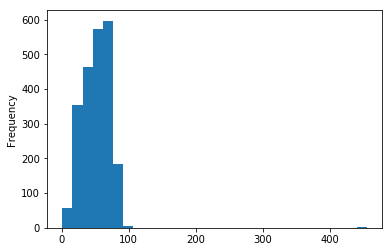

In [153]:
DataMergedd.age.plot.hist(bins=30)

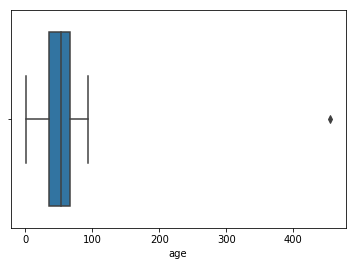

In [155]:
sns.boxplot(DataMergedd['age'])

In [156]:
DataMergedd[DataMergedd['age'] > 120]

,name,address,query hyperthyroid,T4U measured,FTI measured,lithium,TT4,T4U,capital-gain,query hypothyroid,on thyroxine,tumor,TSH,T3,FTI,hours-per-week,sick,thyroid surgery,workclass,I131 treatment,TT4 measured,class,goitre,TSH measured,query on thyroxine,T3 measured,on antithyroid medication,referral source,education-num,psych,occupation,pregnant,Race,Country,Education,Family status,age,sex,date_of_birth
1453,Maria Blaine,"1122 Harper Stravenue Apt. 552, Leblancbury, O...",f,t,t,f,118.0,1.13,0.0,f,f,f,1.13,1.13,104.0,40.0,f,f,private,f,t,negative,f,t,f,t,f,SVI,1.0,f,Priv-house-serv,f,White,Guatemala,Preschool,Widowed,455.0,F,1563-12-06


Záznamy nad 120 rokov sme sa rozhodli vymazať.

In [157]:
DataMergedd = DataMergedd[DataMergedd.age <= 120]
DataMergedd

,name,address,query hyperthyroid,T4U measured,FTI measured,lithium,TT4,T4U,capital-gain,query hypothyroid,on thyroxine,tumor,TSH,T3,FTI,hours-per-week,sick,thyroid surgery,workclass,I131 treatment,TT4 measured,class,goitre,TSH measured,query on thyroxine,T3 measured,on antithyroid medication,referral source,education-num,psych,occupation,pregnant,Race,Country,Education,Family status,age,sex,date_of_birth
0,Dora Richard,"91737 Francis Valley, West Richard, AK 77876",f,t,t,f,118.00,0.88,0.0,f,f,f,0.88,0.88,135.000000,30.00,f,f,private,f,t,negative,f,t,f,t,f,SVI,9.0,f,Sales,f,Black,United-States,HS-grad,Divorced,78.0,F,2039-12-11
1,Pamela Foote,"79316 Roberts Streets, West Williamfurt, ME 99813",f,t,t,f,122.00,1.05,2202.0,f,f,t,1.05,1.05,116.000000,35.00,f,f,private,f,t,negative,f,t,f,t,f,SVI,9.0,f,Other-service,f,White,Italy,HS-grad,Widowed,56.0,F,1961-12-04
2,Walter Jordan,"74254 Joseph Dam Suite 042, Andersonchester, S...",f,t,t,f,93.00,0.86,0.0,f,f,f,0.86,0.86,109.000000,30.00,f,f,private,f,t,negative,f,t,f,t,f,other,10.0,f,Adm-clerical,f,White,United-States,Some-college,Never-married,14.0,M,2004-04-10
3,Terry Mcbain,"2786 Kimberly Greens Suite 871, New Reginaldsi...",f,t,t,f,101.00,0.94,7688.0,f,f,f,0.94,0.94,108.000000,50.00,f,f,self-emp-not-inc,f,t,negative,f,t,f,t,f,SVI,10.0,f,Sales,f,White,United-States,Some-college,Married-civ-spouse,50.0,M,1968-05-23
4,Perla Mclean,"171 Rachel Lodge, East Michael, HI 44722",f,t,t,f,103.00,1.31,0.0,f,f,f,1.31,1.31,76.000000,40.00,f,f,private,f,t,negative,f,t,f,t,f,other,10.0,f,Adm-clerical,f,White,United-States,Some-college,Never-married,23.0,F,1995-03-13
5,Edward Odom,"7316 Adams Crossing Apt. 148, Saraport, IN 20516",f,t,t,f,100.00,1.07,0.0,f,f,f,1.07,1.07,93.000000,60.00,f,f,self-emp-not-inc,t,t,negative,f,t,f,t,f,other,9.0,f,Craft-repair,f,White,United-States,HS-grad,Married-civ-spouse,74.0,F,1944-02-13
6,Troy Noyer,"6364 Crawford Ways Apt. 844, South Lauraland, ...",f,f,f,f,169.00,0.99,0.0,f,f,f,0.99,0.99,111.891192,40.00,f,f,private,f,t,negative,f,t,f,t,f,other,10.0,f,Machine-op-inspct,f,White,United-States,Some-college,Married-civ-spouse,28.0,M,1990-07-06
7,Coletta Holladay,"169 Yesenia Circle, Michaelberg, OK 75412",f,t,t,f,72.00,1.05,0.0,f,f,f,1.05,1.05,71.000000,40.00,f,f,private,f,t,negative,f,t,f,t,f,other,10.0,f,Adm-clerical,f,White,United-States,Some-college,Never-married,36.0,F,1982-09-19
8,Kathryn Woodard,"Unit 1940 Box 8387, DPO AA 25365",t,f,f,f,110.06,0.99,0.0,f,f,f,0.99,0.99,111.891192,60.00,f,f,private,f,f,negative,f,f,f,t,f,other,14.0,f,Exec-managerial,f,Black,United-States,Masters,Divorced,51.0,F,1966-11-05
9,Alyce Parlato,"2427 David Dale Suite 975, New Loriton, MN 87110",f,t,t,f,63.00,1.08,7688.0,t,t,f,1.08,1.08,71.000000,50.00,f,f,private,f,t,negative,f,t,f,t,f,other,10.0,f,Exec-managerial,f,White,United-States,Some-college,Married-civ-spouse,48.0,F,1970-04-15
